In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clustering_1 = pd.read_csv('clustering_1.csv', sep='\t', header=None)
clustering_2 = pd.read_csv('clustering_2.csv', sep='\t', header=None)
clustering_3 = pd.read_csv('clustering_3.csv', sep='\t', header=None)
for i in [clustering_1, clustering_2, clustering_3]:
    i.columns = ['x1', 'x2']

In [3]:
clustering_1.head()

,x1,x2
0,4.19,3.47
1,5.08,6.49
2,6.05,6.22
3,4.63,6.14
4,5.34,4.64


<Axes: xlabel='x1', ylabel='x2'>

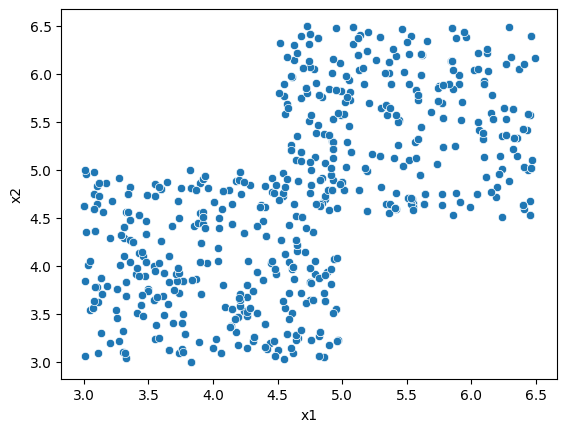

In [4]:
sns.scatterplot(x='x1', y='x2', data=clustering_1)

<Axes: xlabel='x1', ylabel='x2'>

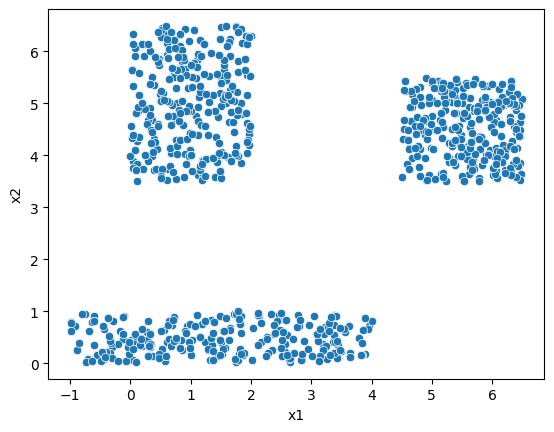

In [5]:
sns.scatterplot(x='x1', y='x2', data=clustering_2)

<Axes: xlabel='x1', ylabel='x2'>

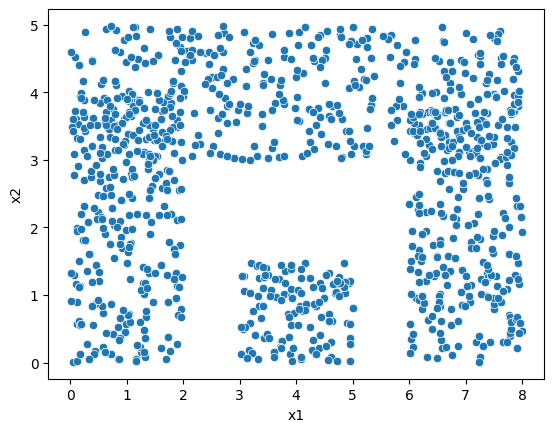

In [6]:
sns.scatterplot(x='x1', y='x2', data=clustering_3)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [9]:
clusters = range(1, 10)

In [10]:
scaled = scaler.fit_transform(clustering_1)
x = []
for i in clusters:
    model = KMeans(n_clusters=i)
    model.fit(scaled)
    x.append(model.inertia_)

In [11]:
abs(pd.Series(x).diff())
#берем 4

0            NaN
1    1008.660025
2     144.106512
3     105.175996
4      91.382744
5      46.773598
6      42.853521
7      18.249629
8      16.751366
dtype: float64

In [12]:
model = KMeans(n_clusters=5)
model.fit(scaled)

KMeans(n_clusters=5)

In [13]:
clustering_1['k_means_clusters'] = model.labels_

<Axes: xlabel='x1', ylabel='x2'>

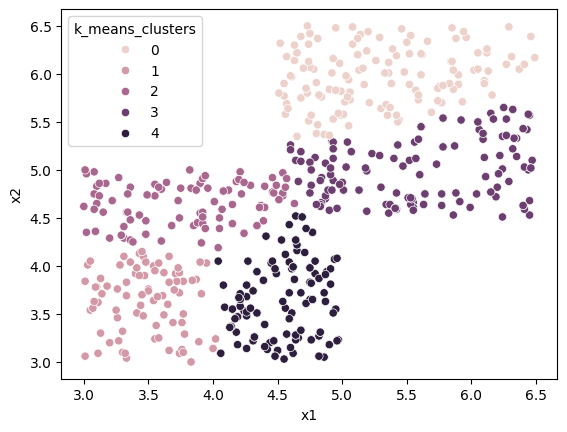

In [14]:
sns.scatterplot(data=clustering_1, x='x1', y='x2', hue='k_means_clusters')

In [15]:
model = DBSCAN(eps=0.5)
model.fit(scaled)

DBSCAN()

In [16]:
clustering_1['dbscan_clusters'] = model.labels_

<Axes: xlabel='x1', ylabel='x2'>

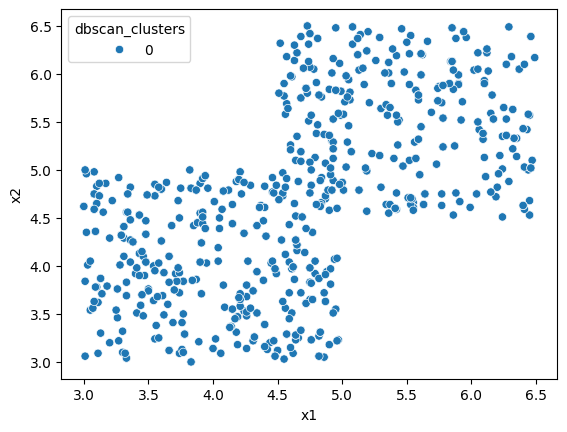

In [17]:
sns.scatterplot(data=clustering_1, x='x1', y='x2', hue='dbscan_clusters')

In [18]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(scaled)

AgglomerativeClustering(n_clusters=5)

In [19]:
clustering_1['agglomerative_clustering'] = model.labels_

<Axes: xlabel='x1', ylabel='x2'>

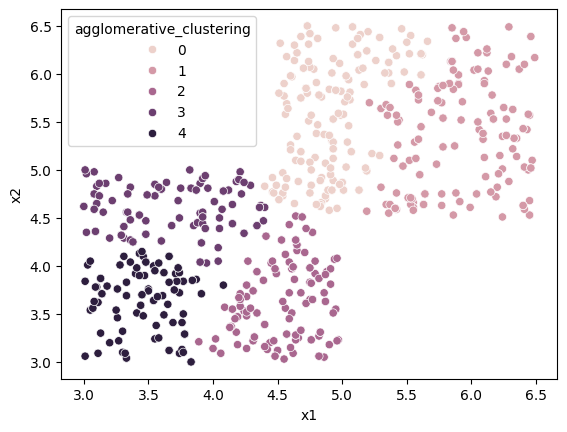

In [20]:
sns.scatterplot(data=clustering_1, x='x1', y='x2', hue='agglomerative_clustering')

In [21]:
clusters = range(1, 10)
def run_models(dataset, number):
    
    scaled = scaler.fit_transform(dataset)
    x = []
    for i in clusters:
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(scaled)
        x.append(model.inertia_)
    diffs = list(abs(pd.Series(x).diff()))
    if number == 1:
        optimal = 4
    elif number == 2:
        optimal = 3
    elif number == 3:
        optimal = 2
    model = KMeans(n_clusters=optimal)
    model.fit(scaled)
    dataset['k_means_clusters'] = model.labels_
    fig_k_means = plt.figure()
    k_means = sns.scatterplot(data=dataset, x='x1', y='x2', hue='k_means_clusters', palette='Dark2', figure=fig_k_means)
    k_means.figure.savefig(f'task2_pictures/clustering_{number} k_means.png')
    plt.legend(loc=(1, 0))
    model = DBSCAN(eps=0.2)
    model.fit(scaled)
    dataset['dbscan_clusters'] = model.labels_
    fig_dbscan = plt.figure()
    dbscan = sns.scatterplot(data=dataset, x='x1', y='x2', hue='dbscan_clusters', palette='Dark2', figure=fig_dbscan)
    dbscan.figure.savefig(f'task2_pictures/clustering_{number} dbscan.png')
    plt.legend(loc=(1, 0))
    model = AgglomerativeClustering(n_clusters=optimal)
    model.fit(scaled)
    dataset[f'agglomerative_clustering'] = model.labels_
    fig_agglomerative = plt.figure()
    agglomerative = sns.scatterplot(data=dataset, x='x1', y='x2', hue='agglomerative_clustering', palette='Dark2', figure=fig_agglomerative)
    agglomerative.figure.savefig(f'task2_pictures/clustering_{number} agglomerative.png')
    plt.legend(loc=(1, 0))
    print(optimal)

4
3
2


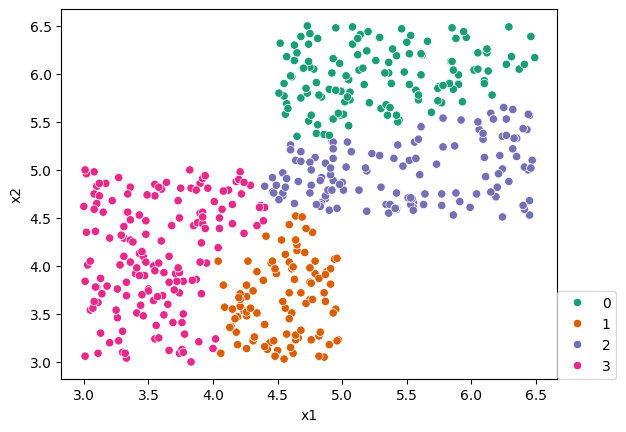

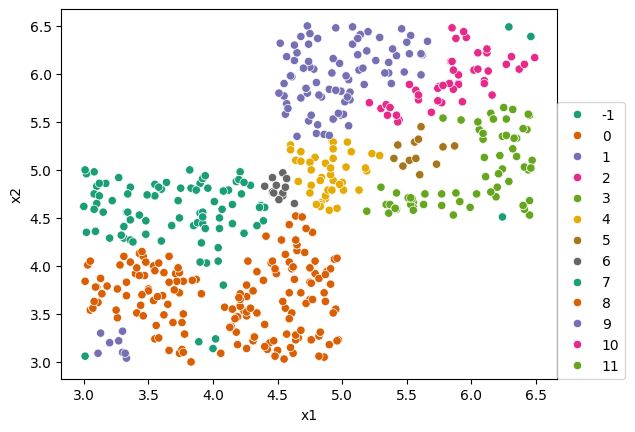

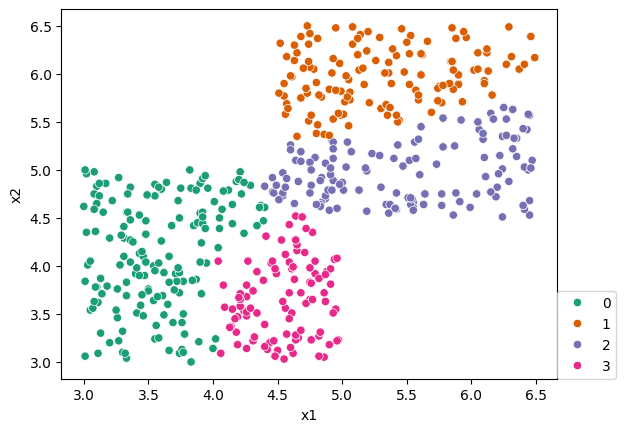

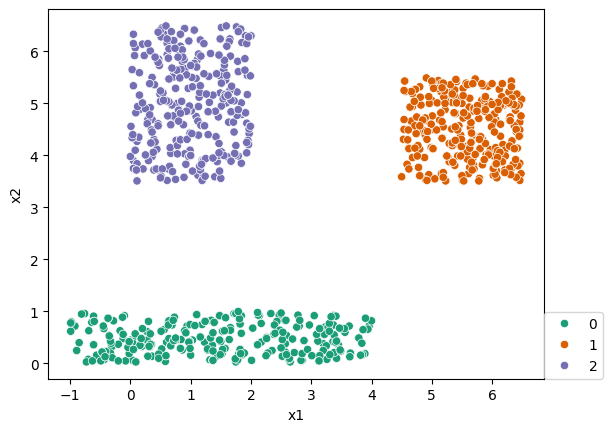

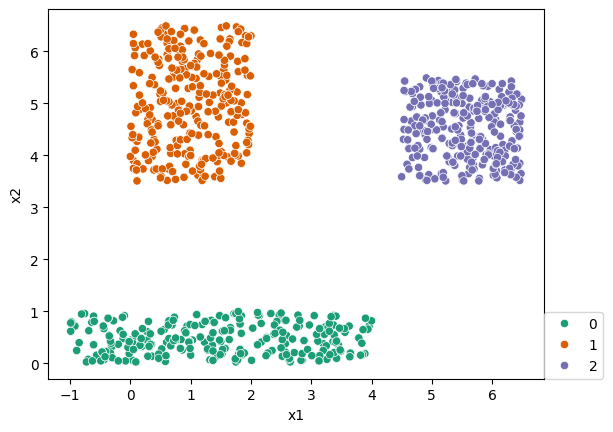

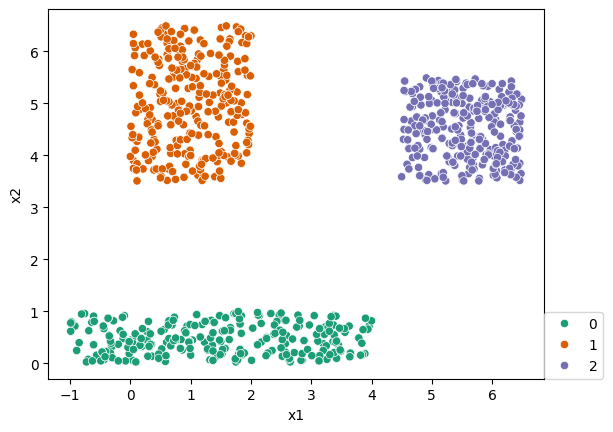

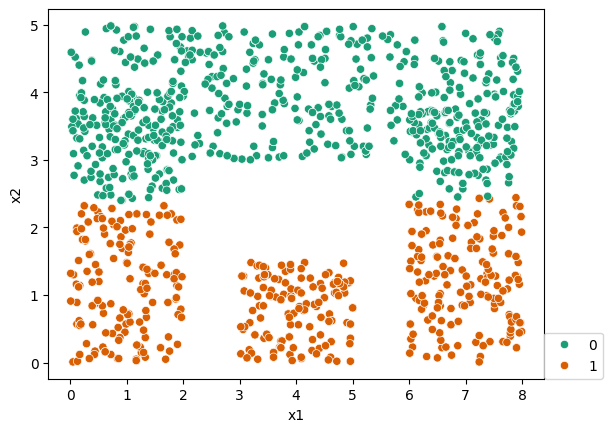

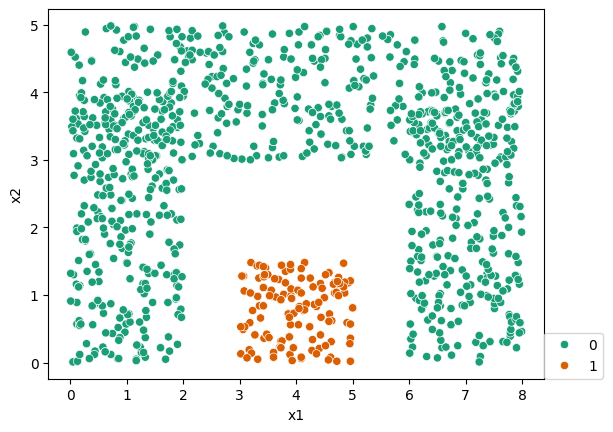

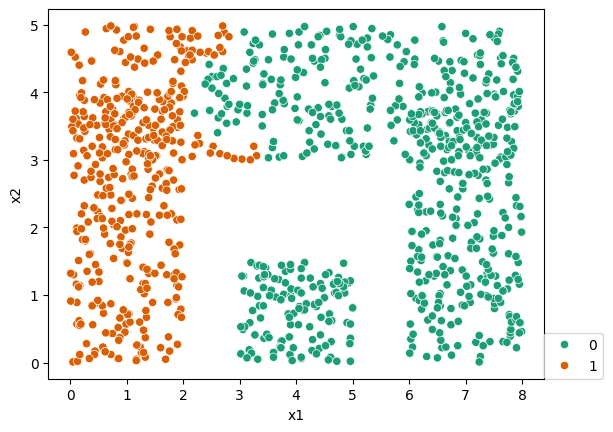

In [22]:
run_models(clustering_1, 1)
run_models(clustering_2, 2)
run_models(clustering_3, 3)